## 1.파이썬 라이브러리 모듈 및 데이터 로드

In [ ]:
#  데이터 처리 모듈
import pandas as pd
pd.set_option("display.max_columns", None)
from sklearn.impute import KNNImputer
# !pip install miceforest
# import miceforest as mf
from copy import copy

# 행렬 등 통계 연산 모듈
import numpy as np
# 지수형 표기법 e를 연속형 변환
pd.options.display.float_format = '{:.4f}'.format
# 타입 어노테이션(Any, Sequence 등의 메서드 활용)
from typing import *
import os

# 구글 드라이브 마운트
from google.colab import drive
drive.mount("/content/drive")
import os

# 조합 찾는 반복문 메서드
from itertools import permutations
from itertools import combinations

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

Mounted at /content/drive


In [ ]:
# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum

fe = fm.FontEntry(
    fname=r"/usr/share/fonts/truetype/nanum/NanumGothic.ttf",
    # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')
# 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)
# Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'})
# 폰트 설정

Selecting previously unselected package fonts-nanum.
(Reading database ... 120875 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
# 텍스트 파일 n개가 포함된 C(로컬디스크) 내 파일경로 설정
file_path = "/content/drive/MyDrive" + "/" + "2023 가명익명처리 해커톤"

# 파일경로 내 텍스트 파일명을 디렉토리 리스트에 저장
file_directory = os.listdir(file_path)
file_dataname: List = [
    ((file_directory[index].split(".csv"))[0]).split("_csv")[0]
    for index in range(len(file_directory))]

file_directory.pop(0)
file_directory.pop(3)
file_directory.pop(3)
file_directory.pop(3)

In [ ]:
display(file_directory)

['예선경연용 데이터셋_학생부_newimpact팀.csv',
 '예선경연용 거주지데이터_학생부_newimpact팀.csv',
 '예선경연용 데이터코드북_학생부_참가자 배포용.csv',
 'JOIN_DATA.csv']

In [ ]:
DATA_LIST = []
for FILE_NAME in file_directory:
  DATA = pd.read_csv(os.path.join(file_path + "/" + FILE_NAME), index_col = False, encoding = "utf-8")
  DATA_LIST.append(DATA)

<ipython-input-5-71ba3e90a58f>:3: DtypeWarning: Columns (20,21,22,23,24,25,26,27,29,30,31,32,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  DATA = pd.read_csv(os.path.join(file_path + "/" + FILE_NAME), index_col = False, encoding = "utf-8")


In [ ]:
# 익명처리 통신 데이터 셋
MAIN_DATA = DATA_LIST[0]
# 거주지 코드
LOC_DATA = DATA_LIST[1]

In [ ]:
# 행번호를 인덱스화
# MAIN_DATA.index = MAIN_DATA["행번호"]
# MAIN_DATA.drop("행번호", axis = 1, inplace = True)

## 2.데이터 타입 변환 및 병합

In [ ]:
class MergeData:
  def __init__(self, MAIN_DATA, LOC_DATA, JOIN_DATA = None):
    self.MAIN_DATA = MAIN_DATA
    self.LOC_DATA = LOC_DATA
    self.JOIN_DATA = JOIN_DATA


  def LeftJoinTable(self, ID_LIST: List, ID: str, lefttable_join_key: str, righttable_join_key: str, join_method: str):
    JOIN_DATA = pd.merge(
        left = self.MAIN_DATA,
        right = self.LOC_DATA,
        left_on = lefttable_join_key,
        right_on = righttable_join_key,
        how = join_method
      )
    self.JOIN_DATA = JOIN_DATA
    self.JOIN_DATA.drop_duplicates(subset = ID_LIST, ignore_index = False, inplace = True)
    self.JOIN_DATA.sort_values(by = ID, ascending = True, inplace = True)
    self.JOIN_DATA.reset_index(drop = True, inplace = True)

    # SKT로 오입력된 행 추출 후 분리하여 저장
    SKT_INDEX = self.JOIN_DATA[self.JOIN_DATA[ID] == 28519]
    self.JOIN_DATA.drop(28518, axis = 0, inplace = True)
    return self.JOIN_DATA, SKT_INDEX


  def selectDataType(self, factor_columns, string_columns, integer_columns, float_columns, date_columns):
    # 필요없는 컬럼 삭제할 일이 없으므로 제거
    # self.JOIN_DATA = self.JOIN_DATA.drop(columns = drop_columns, axis = 1)

    for data_type, columns_list in zip(
        ["category", "object", "int64", "float64"], [factor_columns, string_columns, integer_columns, float_columns]):
      # if len(columns_list) > 0:
      self.JOIN_DATA[columns_list] = self.JOIN_DATA[columns_list].astype(data_type)
      # else: pass
      # df['x'] = pd.to_numeric(df['x'], errors = 'coerce')

    for date_column in date_columns:
      self.JOIN_DATA[date_column] = pd.to_datetime(self.JOIN_DATA[date_column]) # format = '%Y-%m-%d', errors = 'ignore')

    return self.JOIN_DATA

In [ ]:
MERGEDATA_INSTANCE = MergeData(MAIN_DATA, LOC_DATA)

In [ ]:
JOIN_DATA, SKT_INDEX_DATA = MERGEDATA_INSTANCE.LeftJoinTable(
    ID_LIST = ["행번호", "회원 ID"],
    ID = "행번호",
    lefttable_join_key = "추정거주지",
    righttable_join_key  = "거주지코드",
    join_method = "inner"
)
  # ValueError: could not convert string to float: 'SKT'

* ValueError: could not convert string to float: 'SKT'
* 데이터베이스, 시스템 오류 등의 문제로 오입력된 행 찾기
* 행번호 28519, 회원ID D15163615

In [ ]:
SKT_INDEX_DATA
# JOIN_DATA[JOIN_DATA["패스트패션(지수)"] == "SKT"]

* TypeError: 'NoneType' object is not subscriptable
* 배열 인덱스에 접근할 수 없는 자료형

In [ ]:
JOIN_DATA = MERGEDATA_INSTANCE.selectDataType(
    factor_columns = ["성별","가구특성","세대구분","추정거주지","거주지코드","단말기코드","시도명","시군구명","읍면동명"],
    string_columns = '회원 ID',
    integer_columns = [
        '행번호','멤버십 사용 횟수','멤버십 사용 금액','소액결제 사용 횟수','소액결제 사용 금액',
        '쿠팡사용일수','네이버 쇼핑 사용일수','11번가 사용일수','당근마켓 사용일수','옥션, G마켓 사용일수','요기요 사용일수','배달의 민족 사용일수',
        '공연장방문횟수','극장 방문 횟수','자동차 극장 방문횟수'],
    float_columns = [
        '패스트패션(지수)', '명품의류(지수)', '신발(지수)', '배달음식(지수)', '넷플릭스(지수)',
        '영화(지수)', '대형마트(지수)', '오픈마켓(지수)', '홈쇼핑(지수)', '국외직접구매(지수)',
        '면세점/백화점(지수)', '화장품(지수)', '이미용성형(지수)', '국내여행(지수)', '해외여행(지수)'],
    date_columns = ["생년월일"] # 'YM','DLQ_YM','CD_OPN_YM','LN_YM']
)

* 식별자(ID)

  행번호, 회원 ID

* 준식별자 (Qi)와 동질성 집합(Equivalent Class, QI조합의 집합)

  성별, 생년월일, 추정거주지, 거주지코드, 가구특성, 세대구분은 직접적으로 특정 개인을 식별할 수 없으나 다른 정보와 결합 시 개인을 식별할 수 있는 데이터

* 민감속성 또는 민감정보가 있는지

In [ ]:
JOIN_DATA.isnull().sum()

## 3. 이상치 탐색 등 프라이버시 보호를 위한 EDA

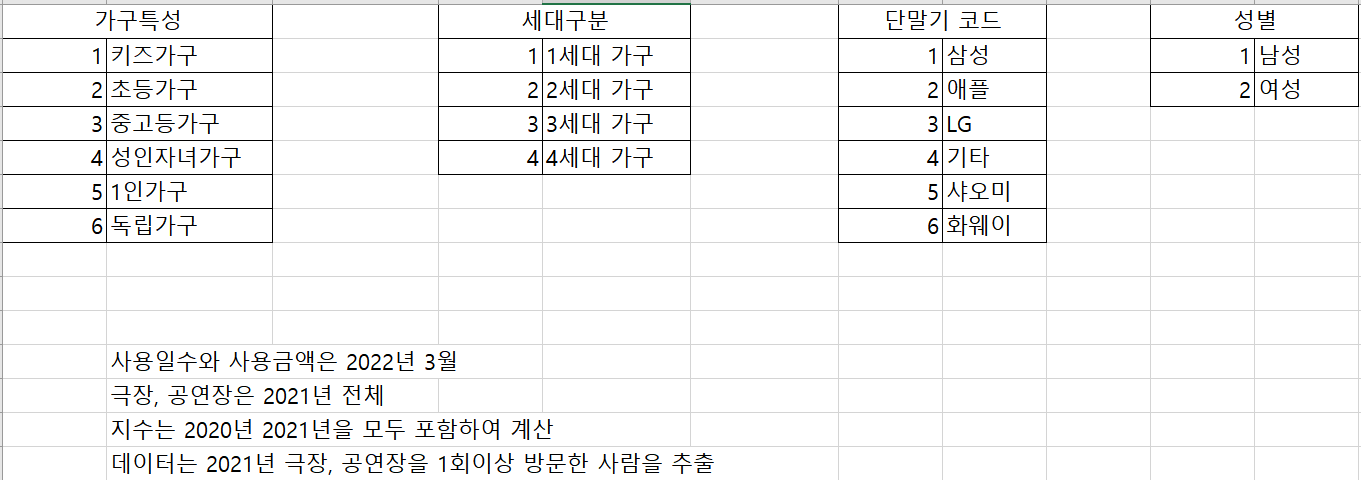

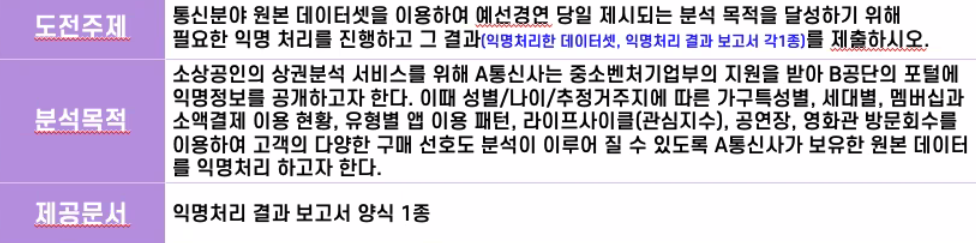

#### 로컬삭제
    
    범주형 데이터의 빈도 기준, 문자 위치나 구분자 분리할 때
    
    =COUNTIF(데이터범위, 검색값)

#### 문자열 분리
    - 구분자로 분리
        
        [주소] 등 문자 위치 분리가 어려울 때, 구분자 분리함
        
        =sgSplit(입력값, 구분자, 쪼갤부분)
        
    - 자릿수 분리
        
        [날짜] 등
        
        =MID(text(입력값, “yyyymmdd”), 시작 부분, 끝나는 부분)
        
        =sgMID(입력값, 시작부분, 끝나는 부분) 사용자정의함수

* 생년월일 변수는 연령대로 변환
* 주소 변수는 범주화

  추정거주지, 거주지코드 행이 1개로 집계된 데이터 추출하여 프라이버시 보호 모델 적용

* 가족 변수는 일반화
  
  세대구분 변수 4(성인자녀가구) 3명인데 어떻게 일반화할지 고민

* 금액 변수는 범주화

In [ ]:
JOIN_DATA["세부주소"] = JOIN_DATA["시도명"].str.cat(JOIN_DATA["시군구명"].str.cat(JOIN_DATA["읍면동명"], sep = " "), sep = " ")
JOIN_DATA["세부주소"] = JOIN_DATA["세부주소"].astype("category")

JOIN_DATA["상위주소"] = JOIN_DATA["시도명"].str.cat(JOIN_DATA["시군구명"], sep = " ")
JOIN_DATA["상위주소"] = JOIN_DATA["상위주소"].astype("category")

In [ ]:
JOIN_DATA["나이"] = 2023 - JOIN_DATA["생년월일"].dt.year + 1

In [ ]:
JOIN_DATA["연령대"] = JOIN_DATA["나이"].apply(lambda age : (age // 10) * 10)

In [ ]:
JOIN_DATA["세부연령대"] = JOIN_DATA["나이"] - JOIN_DATA["연령대"]
JOIN_DATA["세부연령대"] = JOIN_DATA["세부연령대"].apply(lambda x: "초반" if x <= 3 else ("중반" if x <= 6 else "후반"))

In [ ]:
JOIN_DATA["연령대"] = JOIN_DATA["연령대"].astype("str")

In [ ]:
JOIN_DATA["나이대"] = JOIN_DATA["연령대"].str.cat(JOIN_DATA["세부연령대"])

In [ ]:
JOIN_DATA["나이대"] = JOIN_DATA["나이대"].astype("category")

---

In [ ]:
for FACTOR_COLUMN in JOIN_DATA.select_dtypes(include = ["category"]).columns:
  # display( Counter(JOIN_DATA[FACTOR_COLUMN]) )
  display(JOIN_DATA.groupby([FACTOR_COLUMN])[FACTOR_COLUMN] \
                             .count() \
                             .reset_index(name = "count") \
                             .sort_values(["count"], ascending = True))

In [ ]:
LOCAL_COUNT_LIST = []

for LOCAL_COLUMN in ["시도명", "시군구명", "상위주소", "세부주소"]:
  LOCAL_COUNT = JOIN_DATA.groupby([LOCAL_COLUMN])[LOCAL_COLUMN] \
                                  .count() \
                                  .reset_index(name = "count") \
                                  .sort_values(["count"], ascending = True)
  LOCAL_COUNT_LIST.append(LOCAL_COUNT)
  LOCAL_COUNT = 0

In [ ]:
JOIN_DATA[(JOIN_DATA["가구특성"] == 4) & (JOIN_DATA["세대구분"] == 4)]

In [ ]:
JOIN_DATA.groupby(["가구특성", "세대구분"]).count().iloc[:, 0:1]

In [ ]:
# JOIN_DATA.reset_index(drop = True, inplace = True)

In [ ]:
JOIN_DATA[["상위주소", "나이대", "가구특성", "세대구분"]]

```
MULTI_COL = pd.DataFrame()
MULTI_COL = JOIN_DATA #.copy.deepcopy()
MULTI_COL.dropna(inplace = True)
MULTI_COL.index = MULTI_COL[["상위주소", "연령대", "가구특성", "세대구분"]]
# tuple_columns_list =
# multi_index_columns = pd.MultiIndex.from_tuples(JOIN_DATA[["상위주소", "나이대", "가구특성", "세대구분"]])

MULTI_COL = MULTI_COL.sort_values(by = ["상위주소", "연령대", "가구특성", "세대구분"])

MULTI_COL.index = pd.MultiIndex.from_tuples(MULTI_COL.index)

pd.set_option("display.max_row", None)

# 준식별자 동질성 집합(비식별 조치 목적 EDA)
MULTI_DATA = MULTI_COL.loc[:, ["상위주소", "가구특성", "세대구분", "연령대"]]

HOUSE_DATA = JOIN_DATA.groupby(["상위주소", "가구특성"]).count().iloc[:, 0:1]

STATE_COUNT = JOIN_DATA.groupby(["시도명", "연령대"]).count().iloc[:, 0:1]
STATE_COUNT = STATE_COUNT.reset_index()

REGION_COUNT = JOIN_DATA.groupby(["상위주소", "연령대"]).count().iloc[:, 0:1]

STATE_SUM = STATE_COUNT.groupby("시도명").sum()
STATE_SUM.reset_index(drop = False, inplace = True)

STATE_MEAN = pd.merge(
    left = STATE_COUNT,
    right = STATE_SUM,
    on = "시도명",
    how = "left"
)

STATE_SUM.info()

STATE_MEAN["시도별_연령대별_평균"] = np.round(STATE_MEAN["행번호_x"] / STATE_MEAN["행번호_y"], 0)
# 행번호_y = 시도별 합계
# 행번호_y = 연령대별 합계 (X)
# 행번호_x = 시도별 연령대별 집계값

```

___

In [ ]:
len(LOCAL_COUNT_LIST[2][LOCAL_COUNT_LIST[2]["count"] <= 10])

In [ ]:
LOCAL_COUNT_LIST[2][(LOCAL_COUNT_LIST[2]["count"] <= 10) & (LOCAL_COUNT_LIST[2]["count"] >= 4)]["상위주소"].tolist()

In [ ]:
K_ANONYMOUS_LIST = LOCAL_COUNT_LIST[2][(LOCAL_COUNT_LIST[2]["count"] <= 10) & (LOCAL_COUNT_LIST[2]["count"] >= 4)]["상위주소"].tolist()

In [ ]:
# for K in K_ANONYMOUS_LIST[::-1]: display(MULTI_DATA[MULTI_DATA["상위주소"] == K])

In [ ]:
pd.set_option("display.max_row", 10)

___

## 4.거주지역 시군구에서 시도명으로 k = 10으로 두어 프라이버시 보호 모델 적용(마스킹)

### 마스킹
    
    범주형 데이터 처리
    데이터 식별성 요소 검토 — i) 자리수 유지 : 식별 요소 有, ii) 자릿수 감추기 : 식별성 떨어트림
    
    = REPT(반복문자, 반복횟수)
    
    = LEN(입력문자열)
    
    = CONCATENATE(연결문자1, …., 연결문자N)
    
    = sgMAXLEN(데이터범위) : 전체 자리수 중 가장 긴 수, 사용자정의함수
    
    EX) 표시문자 : LEFT(입력값, 표시할 문자수)
    
    마스킹 문자 : REPT(”*”, LEN(*DATA*)-표시문자열 수)
    
    표시문자와 마스킹 문자 합치기 : CONCATENATE()
    
    모두 동일자리로 처리하기
    
    - 마스킹 문자 : sgMAXLEN()-LEN(표시문자열)
    - 최종 : CONCATENATE(표시문자, 마스킹된 문자)

In [ ]:
K_INDEX = JOIN_DATA["상위주소"][JOIN_DATA["상위주소"].isin(K_ANONYMOUS_LIST)].index

In [ ]:
JOIN_DATA["익명처리_상위주소"] = JOIN_DATA["상위주소"]
JOIN_DATA["익명처리_상위주소"] = JOIN_DATA["익명처리_상위주소"].astype("str")
JOIN_DATA.iloc[K_INDEX, JOIN_DATA.columns.get_loc("익명처리_상위주소")] = JOIN_DATA.iloc[K_INDEX, JOIN_DATA.columns.get_loc("시도명")]

In [ ]:
JOIN_DATA.iloc[K_INDEX, JOIN_DATA.columns.get_loc("익명처리_상위주소")]

In [ ]:
NAN_INDEX = JOIN_DATA["상위주소"][JOIN_DATA["상위주소"].isna()].index

In [ ]:
JOIN_DATA.iloc[NAN_INDEX, JOIN_DATA.columns.get_loc("익명처리_상위주소")] = JOIN_DATA.iloc[NAN_INDEX, JOIN_DATA.columns.get_loc("시도명")]

In [ ]:
JOIN_DATA.iloc[NAN_INDEX, JOIN_DATA.columns.get_loc("익명처리_상위주소")]

___

## 5.연속형 변수 랜덤라운딩, 수치형 범주화, 상하단코딩을 통한 이상치 처리

#### 라운딩
    
    수치형 데이터 처리, 라운딩 기법별 유용성 검토
    
    = ROUND(”입력값”, 정수 또는 소수점 구분과 자리수 입력)
    
    데이터의 자리수가 다양할 때 고정 자리수 적용하면 데이터가 유실될 수 있음 — 숫자의 자릿수와 라운딩 고정자릿수가 같으면 유실
    
    따라서 자릿수에서 -1 한 값을 고정라운딩 시켜야 함
    
    = ROUND(”입력값”, -(LEN(”입력값”)-1))
    
    가명정보는 처리 목적달성 가능성을 봐야하는데, 데이터가 많이 유실되면 목적 달성 불가능

In [ ]:
JOIN_DATA.info()
# 생년월일 -> 연령대
# 추정거주지, 거주지코드, 시도명, 시군구명, 읍면동명 -> 익명처리_상위주소

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 0 to 99999
Data columns (total 49 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   행번호           99999 non-null  int64         
 1   회원 ID         99999 non-null  object        
 2   성별            99999 non-null  category      
 3   생년월일          99999 non-null  datetime64[ns]
 4   가구특성          99999 non-null  category      
 5   세대구분          99999 non-null  category      
 6   추정거주지         99999 non-null  category      
 7   단말기코드         99999 non-null  category      
 8   멤버십 사용 횟수     99999 non-null  int64         
 9   멤버십 사용 금액     99999 non-null  int64         
 10  소액결제 사용 횟수    99999 non-null  int64         
 11  소액결제 사용 금액    99999 non-null  int64         
 12  쿠팡사용일수        99999 non-null  int64         
 13  네이버 쇼핑 사용일수   99999 non-null  int64         
 14  11번가 사용일수     99999 non-null  int64         
 15  당근마켓 사용일수     99999 non-null  int64 

In [ ]:
plt.boxplot(JOIN_DATA["소액결제 사용 금액"])
plt.show()
plt.boxplot(JOIN_DATA["멤버십 사용 금액"])
plt.show()

In [ ]:
JOIN_DATA[["소액결제 사용 금액", "멤버십 사용 금액"]].describe()

In [ ]:
print(
    len(JOIN_DATA["소액결제 사용 금액"][JOIN_DATA["소액결제 사용 금액"] == 0]), len(JOIN_DATA["멤버십 사용 금액"][JOIN_DATA["멤버십 사용 금액"] == 0])
)

백분위 99%, 6시그마, 1.5IQR

In [ ]:
percent = 99.9
np.percentile(JOIN_DATA["소액결제 사용 금액"], percent)

JOIN_DATA["소액결제 사용 금액"][
    JOIN_DATA["소액결제 사용 금액"] >= np.percentile(JOIN_DATA["소액결제 사용 금액"], percent)]
np.percentile(JOIN_DATA["소액결제 사용 금액"], percent)
  # 2613666
  # 2613666.0000002533

In [ ]:
percent = 99.9
np.percentile(JOIN_DATA["멤버십 사용 금액"], percent)

JOIN_DATA["멤버십 사용 금액"][
    JOIN_DATA["멤버십 사용 금액"] >= np.percentile(JOIN_DATA["멤버십 사용 금액"], percent)]
np.percentile(JOIN_DATA["멤버십 사용 금액"], percent)
  # 61800.260000001

In [ ]:
print(
    JOIN_DATA["소액결제 사용 금액"].mean() - 6 * JOIN_DATA["소액결제 사용 금액"].std(),
    JOIN_DATA["소액결제 사용 금액"].mean() + 6 * JOIN_DATA["소액결제 사용 금액"].std()
) # -1022398.5984903532 1076263.5131394998


In [ ]:
def outlierDetection(dataframe, dataframe_columns: List):
                     # remove_column_list: List):
    # for column in remove_column_list:
      # dataframe_columns.remove(column)

    for column in dataframe_columns:
      column_data = dataframe[column]
      # 1사분위수, 3사분위수 계산
      Q1 = column_data.quantile(0.25)
        # TypeError: unsupported operand type(s) for -: 'str' and 'str'
      Q3 = column_data.quantile(0.75)
      IQR = Q3-Q1
      # 이상치 경계값 계산
      # lower_bound = Q1 - 1.5*IQR
      upper_bound = Q3 + 1.5*IQR
      # 이상치를 경계값으로 처리
      print(IQR, upper_bound)
      dataframe[column] = dataframe[column].apply(lambda x: upper_bound if x >= upper_bound else x)

    return dataframe[dataframe_columns]

In [ ]:
# outlierDetection(dataframe = JOIN_DATA, dataframe_columns = ["소액결제 사용 금액", "멤버십 사용 금액"])

In [ ]:
def Rounding(num_change):
  str_result = ""

  if num_change >= 10000:
    # 1만 이상
    str_result += f" {int(num_change // 10000):,}만"
    num_change = num_change % 10000
  elif num_change >= 1000:
    # 1천 이상
    str_result += f" {int(num_change // 1000):,}천"
  else:
    str_result = "0"

  str_result = str_result.strip()
  # Return a copy of the string with the leading and trailing characters removed
  #if len(str_result) >= 1:
    # return str_result + "원"
  #else:
  return str_result

```
   if num_change >= 10000: # 1만 이상
        str_result += f" {int(num_change // 10000):,}만"
        num_change = num_change % 10000
    if num_change >= 1: # 1 이상
        str_result += f" {int(num_change):,}"
        
    str_result = str_result.strip() # Return a copy of the string with the leading and trailing characters removed
    if len(str_result) >= 1:
        return str_sign + str_result + "원"
    else:
        return str_result
```

In [ ]:
JOIN_DATA["익명처리_소액결제 사용 금액"] = JOIN_DATA["소액결제 사용 금액"].apply(Rounding)
# JOIN_DATA["멤버십 사용 금액"]

In [ ]:
JOIN_DATA["익명처리_소액결제 사용 금액"][JOIN_DATA["익명처리_소액결제 사용 금액"] != "0"]

In [ ]:
JOIN_DATA["익명처리_멤버십 사용 금액"] = JOIN_DATA["멤버십 사용 금액"].apply(Rounding)

In [ ]:
JOIN_DATA["익명처리_멤버십 사용 금액"][JOIN_DATA["익명처리_멤버십 사용 금액"] != "0"]

___

In [ ]:
JOIN_DATA.columns

In [ ]:
JOIN_DATA.drop(['추정거주지', '거주지코드', '시도명', '시군구명', '읍면동명', '세부주소', '상위주소', '나이', '세부연령대', '나이대'], axis = 1, inplace = True)

## 6.이커머스 등 사용횟수 수치형 데이터의 범주화

#### 상하단코딩
    
    수치형 데이터 처리, 백분위 수로 변경
    범위의 상,하단의 범위 내의 값을 백분위처리함
    
    =PERCENTILE.INC(”데이터범위”(*array)*, “백분위 수”*k*)
    
    - 상단이상치 검색
        
        = IF(입력 값 > 상단이상치 기준 셀, “상단이상치”, “상단이상치 아님”)

```
JOIN_DATA["범주화3_멤버십 사용 횟수"] = pd.cut(JOIN_DATA['멤버십 사용 횟수'], bins = 3, right = True)
JOIN_DATA["범주화4_멤버십 사용 횟수"] = pd.cut(JOIN_DATA['멤버십 사용 횟수'], bins = 4, right = True)
JOIN_DATA["범주화5_멤버십 사용 횟수"] = pd.cut(JOIN_DATA['멤버십 사용 횟수'], bins = 5, right = True)

Counter(JOIN_DATA["범주화3_멤버십 사용 횟수"])

Counter({Interval(-0.033, 11.0, closed='right'): 98063,
         Interval(11.0, 22.0, closed='right'): 1627,
         Interval(22.0, 33.0, closed='right'): 309})

Counter(JOIN_DATA["범주화4_멤버십 사용 횟수"])

Counter({Interval(-0.033, 8.25, closed='right'): 95177,
         Interval(8.25, 16.5, closed='right'): 4145,
         Interval(16.5, 24.75, closed='right'): 413,
         Interval(24.75, 33.0, closed='right'): 264})

Counter(JOIN_DATA["범주화5_멤버십 사용 횟수"])

Counter({Interval(-0.033, 6.6, closed='right'): 91069,
         Interval(6.6, 13.2, closed='right'): 7771,
         Interval(13.2, 19.8, closed='right'): 756,
         Interval(26.4, 33.0, closed='right'): 224,
         Interval(19.8, 26.4, closed='right'): 179})
```

In [ ]:
# JOIN_DATA["이상치_범주화3_멤버십 사용 횟수"] = pd.cut(JOIN_DATA['멤버십 사용 횟수'], bins = 3, right = True)
# JOIN_DATA["이상치_범주화4_멤버십 사용 횟수"] = pd.cut(JOIN_DATA['멤버십 사용 횟수'], bins = 4, right = True)
# JOIN_DATA["이상치_범주화5_멤버십 사용 횟수"] = pd.cut(JOIN_DATA['멤버십 사용 횟수'], bins = 5, right = True)

In [ ]:
def percentileOutlier(JOIN_DATA: pd.DataFrame, percent: float, COLUMN: str):
  np.percentile(JOIN_DATA[COLUMN], percent)

  JOIN_DATA[COLUMN][
      JOIN_DATA[COLUMN] >= np.percentile(JOIN_DATA[COLUMN], percent)] = np.percentile(JOIN_DATA[COLUMN], percent)
  return JOIN_DATA[COLUMN]

In [ ]:
for COLUMN in ['멤버십 사용 횟수','소액결제 사용 횟수', '쿠팡사용일수', '네이버 쇼핑 사용일수', '11번가 사용일수', '당근마켓 사용일수', '옥션, G마켓 사용일수', '요기요 사용일수', '배달의 민족 사용일수', '쿠팡이츠 사용일수', '공연장방문횟수', '극장 방문 횟수', '자동차 극장 방문횟수']:
  JOIN_DATA[COLUMN] = percentileOutlier(JOIN_DATA = JOIN_DATA, percent = 99.9, COLUMN = COLUMN)

In [ ]:
JOIN_DATA[['멤버십 사용 횟수','소액결제 사용 횟수', '쿠팡사용일수', '네이버 쇼핑 사용일수', '11번가 사용일수', '당근마켓 사용일수', '옥션, G마켓 사용일수', '요기요 사용일수', '배달의 민족 사용일수', '쿠팡이츠 사용일수', '공연장방문횟수', '극장 방문 횟수', '자동차 극장 방문횟수']].describe()

In [ ]:
for COLUMN in ['멤버십 사용 횟수','소액결제 사용 횟수', '쿠팡사용일수', '네이버 쇼핑 사용일수', '11번가 사용일수', '당근마켓 사용일수', '옥션, G마켓 사용일수', '요기요 사용일수', '배달의 민족 사용일수', '쿠팡이츠 사용일수', '공연장방문횟수', '극장 방문 횟수', '자동차 극장 방문횟수']:
  JOIN_DATA[COLUMN] = pd.cut(JOIN_DATA[COLUMN], bins = 5, right = True)

In [ ]:
class NumericPreprocessing():
  def __init__(self, DATA_LIST: List, MAIN_DATA: pd.DataFrame):
    self.DATA_LIST = DATA_LIST
    self.MAIN_DATA = MAIN_DATA



# 상하단 코딩
  # 데이터 배열 또는 범위에서 k값에 해당하는 백분위수를 나타내는 숫자 : 백분위수 값(k-익명성)
  def percentileOutlierSearch(self, percent, select_columns, outlierTF_colname,
                 lower_limit, upper_limit):
    # [1] 경계값 설정 1 ~ 10%
    print( self.MAIN_DATA[select_columns].loc[:, self.MAIN_DATA[select_columns] <= lower_limit] )
    print( self.MAIN_DATA[select_columns].loc[:, self.MAIN_DATA[select_columns] >= upper_limit] )

    # [2] 상단 이상치 검색하여 새로운 컬럼 생성
    # [3] 하단 이상치 검색하여 새로운 컬럼 생성
    outlier_index = self.MAIN_DATA[select_columns].loc[
        :, (self.MAIN_DATA[select_columns] <= lower_limit) or (self.MAIN_DATA[select_columns] >= upper_limit)].index.tolist()

    # [4] 상하단 이상치 검색
    self.MAIN_DATA[outlierTF_colname] = 0
    self.MAIN_DATA.iloc[outlier_index, self.MAIN_DATA.columns.get_loc(outlierTF_colname)]
    return self.MAIN_DATA

    # [1~4] 단, 상하단 이상치를 나누어 검색할 수 없다는 한계 有
    # threshold = np.percentile(self.MAIN_DATA[select_columns], percent)
    # self.MAIN_DATA[outlierTF_colname] =  self.MAIN_DATA[select_columns].apply(
       # lambda data: "SAFE" if (data <= threshold) or (data >= threshold) else "OUTLIER")

  # def percentileOutlierDrop()
    # [5] 이상치 대상 삭제 처리



# 차분 프라이버시
  def timeSeriesDifferencing(self, select_columns):
    y_differencing = self.MAIN_DATA[select_columns].diff()
    y_differencing.fillna(method = "ffill", inplace = True)
    y_differencing.fillna(method = "bfill", inplace = True)
    y_differencing.columns = ["y_difference"]
      # if "y_difference" not in dataframe.columns: dataframe = pd.concat([dataframe, Y_differencing], axis = 1)
    return y_differencing

  def timeSeriesFinalData(self):
    differencing_method_return = pd.DataFrame()
    self.MAIN_DATA.info()
    for col_name in self.MAIN_DATA.columns:
      differencing_method_return[col_name] = self.timeSeriesDifferencing(select_columns = col_name)
    return differencing_method_return


# 최댓값, 최빈값, 중간값, 평균값, 최솟값
# 라운드 : 지정 실수 자릿수로 올림 또는 내림
  # 문제는 숫자의 자릿수와 라운딩 자릿수의 유실되는 문제 발생(0)
  # 대안은 랜덤 라운딩


# 수치형을 범주형으로 변환하는 범주화
  # 몫 : 지정된 숫자를 나누어 몫 구하기
  # 샘플링 : 지정된 범위에서 임의의 값을 생성

#### 범주화
    
    제시된 샘플데이터를 대상으로 기준단위로 나누고, 최대/최소 중 어디에 포함되는 지를 파악, 수치형을 범주형으로 변환
    
    기호의 의미 이해 — [ ] : 이상, 이하 / ( ) : 초과, 미만
    
    범위시작(몫), 범위 끝(몫+1) → **범주 데이터 : [ )**
    
    - 범위 끝 : = QUOTIENT(입력값, 기준단위)+1
    - 범주데이터 : = CONCATENATE(”[”,QUOTIENT(입력값, 기준단위)*기준단위,”,”,(QUOTIENT(입력값, 기준단위)+1)*기준단위,”)”)

#### 코드화
    
    [종교], [수능등급]등 범주형 데이터를 다중코드로 처리할 때
    
    [성별] : 여자가 현격히 적거나 남자가 현격히 적으면 특정될 수 있으니까 다중코드로 처리
    
    = INDEX(데이터범위, 범위내 선택할 열)
    
    = RANDBETWEEN(난수 최소값, 난수 최대값) - 난수의 범위 설정
    
    = IF(입력값 = “남”, INDEX(데이터범위, RANDBETWEEN(난수 최소값, 난수 최대값)), INDEX(데이터범위, RANDBETWEEN(난수 최소값, 난수 최대값)))

In [ ]:
"""
def outlierDetection(dataframe, dataframe_columns: List):
                     # remove_column_list: List):
    # for column in remove_column_list:
      # dataframe_columns.remove(column)

    for column in dataframe_columns:
      column_data = dataframe[column]
      three_sigma = column_data.mean() + 3 * column_data.std()
      # Q3 = column_data.quantile(0.75)
      # IQR = Q3-Q1
      # 이상치 경계값 계산
      # 이상치를 경계값으로 처리
      print(three_sigma)
      dataframe[column] = dataframe[column].apply(lambda x: three_sigma if x >= three_sigma else x)

    return dataframe[dataframe_columns]
"""

'\ndef outlierDetection(dataframe, dataframe_columns: List):\n                     # remove_column_list: List):\n    # for column in remove_column_list:\n      # dataframe_columns.remove(column)\n\n    for column in dataframe_columns:\n      column_data = dataframe[column]\n      three_sigma = column_data.mean() + 3 * column_data.std()\n      # Q3 = column_data.quantile(0.75)\n      # IQR = Q3-Q1\n      # 이상치 경계값 계산\n      # 이상치를 경계값으로 처리\n      print(three_sigma)\n      dataframe[column] = dataframe[column].apply(lambda x: three_sigma if x >= three_sigma else x)\n    \n    return dataframe[dataframe_columns]\n'

In [ ]:
# JOIN_DATA[['패스트패션(지수)', '명품의류(지수)', '신발(지수)', '배달음식(지수)', '넷플릭스(지수)', '영화(지수)', '대형마트(지수)', '오픈마켓(지수)', '홈쇼핑(지수)', '국외직접구매(지수)', '면세점/백화점(지수)', '화장품(지수)', '이미용성형(지수)', '국내여행(지수)', '해외여행(지수)']] = outlierDetection(
#    dataframe = JOIN_DATA, dataframe_columns = ['패스트패션(지수)', '명품의류(지수)', '신발(지수)', '배달음식(지수)', '넷플릭스(지수)', '영화(지수)', '대형마트(지수)', '오픈마켓(지수)', '홈쇼핑(지수)', '국외직접구매(지수)', '면세점/백화점(지수)', '화장품(지수)', '이미용성형(지수)', '국내여행(지수)', '해외여행(지수)'])

In [ ]:
for COLUMN in ['패스트패션(지수)', '명품의류(지수)', '신발(지수)', '배달음식(지수)', '넷플릭스(지수)', '영화(지수)', '대형마트(지수)', '오픈마켓(지수)', '홈쇼핑(지수)', '국외직접구매(지수)', '면세점/백화점(지수)', '화장품(지수)', '이미용성형(지수)', '국내여행(지수)', '해외여행(지수)']:
  JOIN_DATA[COLUMN] = pd.cut(JOIN_DATA[COLUMN], bins = 3, right = True)

In [ ]:
JOIN_DATA[['패스트패션(지수)', '명품의류(지수)', '신발(지수)', '배달음식(지수)', '넷플릭스(지수)', '영화(지수)', '대형마트(지수)', '오픈마켓(지수)', '홈쇼핑(지수)', '국외직접구매(지수)', '면세점/백화점(지수)', '화장품(지수)', '이미용성형(지수)', '국내여행(지수)', '해외여행(지수)']].describe()

In [ ]:
MAIN_DATA.describe()

In [ ]:
# SKT_INDEX_DATA

In [ ]:
JOIN_DATA.info()

In [ ]:
JOIN_DATA[JOIN_DATA["익명처리_상위주소"] == "제주특별자치도 서귀포시"]

In [ ]:
"SKT_INDEX_DATA

In [ ]:
JOIN_DATA["행번호"]

In [ ]:
DATA = pd.DataFrame(JOIN_DATA[JOIN_DATA["행번호"] == 93228])

In [ ]:
FINAL_DATA = pd.concat([JOIN_DATA, DATA])

In [ ]:
FINAL_DATA.iloc[100000, 0] = 28519
FINAL_DATA.iloc[100000, 1] = "D15163615"

In [ ]:
# FINAL_DATA.drop("생년월일", axis = 1, inplace = True)
FINAL_DATA.drop([0, 1], axis = 1, inplace = True)

In [ ]:
FINAL_DATA

In [ ]:
FINAL_DATA.to_csv("/content/drive/MyDrive/2023 가명익명처리 해커톤/JOIN_DATA.csv", index = False)